# Análisis exploratorio de la Oferta

* Explorar características de los prestadores:
  1. Que tipo de prestadores.Ejemplo :Clinico,Cardiologo...etc
  2. Que tipo de atencion realizo. Ejemplo: Online, presencial
  3. Ver tipo de calificaciones de la
  

* Explorar consumos. Analizar su distribución
  1. Ver especialidad y consumos
  2. 

In [71]:
import io
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt


In [49]:
df=pd.read_csv('.\Data\Dataset_oferta.csv',sep=';')
df.head(5)


,id_prestador_encoded,especialidad_prestador_encoded,descripcion_practica_encoded,Q consumos,Promedio calificacion recibida
0,200030,CLINICA MEDICA,ATENCION ON LINE COVID19,1,2
1,200123,CLINICA MEDICA,ATENCION ON LINE COVID19,1,3
2,200133,CLINICA MEDICA,ATENCION ON LINE COVID19,1,3
3,200137,CLINICA MEDICA,ATENCION ON LINE COVID19,1,2
4,200167,CLINICA MEDICA,ATENCION ON LINE COVID19,1,1


In [26]:
df.info()
print('Numero de filas,columans',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_prestador_encoded            196 non-null    int64 
 1   especialidad_prestador_encoded  196 non-null    object
 2   descripcion_practica_encoded    196 non-null    object
 3   Q consumos                      196 non-null    int64 
 4   Promedio calificacion recibida  196 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.8+ KB
Numero de filas,columans (196, 5)


In [67]:
df['Promedio calificacion recibida'] = df['Promedio calificacion recibida'].replace(',','.', regex=True).astype(float)

In [68]:
df.info()
print('Numero de filas,columans',df.shape)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_prestador_encoded            196 non-null    int64  
 1   especialidad_prestador_encoded  196 non-null    object 
 2   descripcion_practica_encoded    196 non-null    object 
 3   Q consumos                      196 non-null    int64  
 4   Promedio calificacion recibida  196 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.8+ KB
Numero de filas,columans (196, 5)


,id_prestador_encoded,especialidad_prestador_encoded,descripcion_practica_encoded,Q consumos,Promedio calificacion recibida
0,200030,CLINICA MEDICA,ATENCION ON LINE COVID19,1,2.0
1,200123,CLINICA MEDICA,ATENCION ON LINE COVID19,1,3.0
2,200133,CLINICA MEDICA,ATENCION ON LINE COVID19,1,3.0
3,200137,CLINICA MEDICA,ATENCION ON LINE COVID19,1,2.0
4,200167,CLINICA MEDICA,ATENCION ON LINE COVID19,1,1.0


In [45]:
df.describe()

,id_prestador_encoded,Q consumos,Promedio calificacion recibida
count,196.00000,196.000000,196.000000
mean,200097.50000,12.755102,4.145958
std,56.72448,16.324945,2.603166
min,200000.00000,1.000000,1.000000
25%,200048.75000,3.000000,2.000000
50%,200097.50000,7.000000,4.215909
75%,200146.25000,17.000000,4.600000
max,200195.00000,101.000000,9.206897


In [50]:
df.isnull().sum()

id_prestador_encoded              0
especialidad_prestador_encoded    0
descripcion_practica_encoded      0
Q consumos                        0
Promedio calificacion recibida    0
dtype: int64

## Explorar características de los prestadores:
  1. Que tipo de prestadores: Clinico,Nutricionista,Pediatra
  2. Que tipo de atencion realizo: Online
  3. Rango de calificacion: 1.00 - 9.20
  4. Distribucion de las calificaciones segun Especialidad.

C:\Users\silvi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


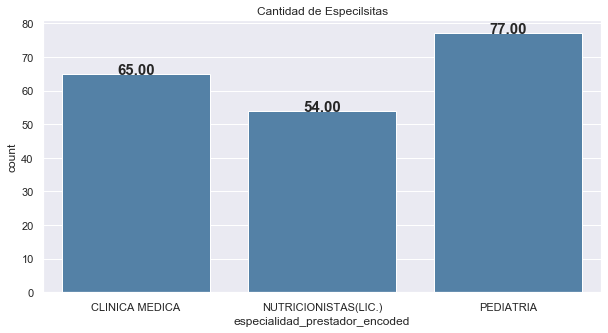

In [115]:
# Ver los tipos de especialistas
plt.figure(figsize=(10,5))
ax=sns.countplot(df.especialidad_prestador_encoded, color='steelblue')
plt.title("Cantidad de Especilsitas")
sns.set(style="darkgrid")
for p in ax.patches:
    valores='{:,.2f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.5
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=15,weight='bold')

plt.show()


In [63]:
# Ver por especialidad que tipo de atencion realizo
pd.crosstab(df.descripcion_practica_encoded , df.especialidad_prestador_encoded)

especialidad_prestador_encoded,CLINICA MEDICA,NUTRICIONISTAS(LIC.),PEDIATRIA
descripcion_practica_encoded,,,
ATENCION ON LINE COVID19,65,54,77


Text(0, 0.5, 'Especilidad_Medica')

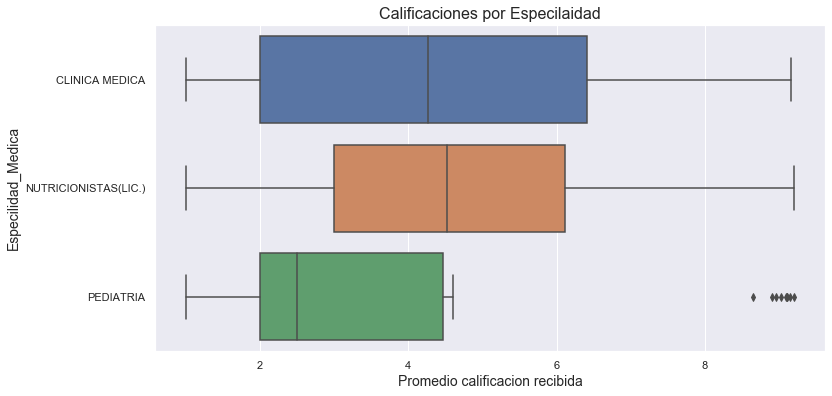

In [91]:
# ver relacion entre  las calificaciones segun Especialidad
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=df['Promedio calificacion recibida'], y=df.especialidad_prestador_encoded)
plt.title('Calificaciones por Especilaidad', size=16)
plt.xlabel('Promedio calificacion recibida', size=14)
plt.ylabel('Especilidad_Medica', size=14)

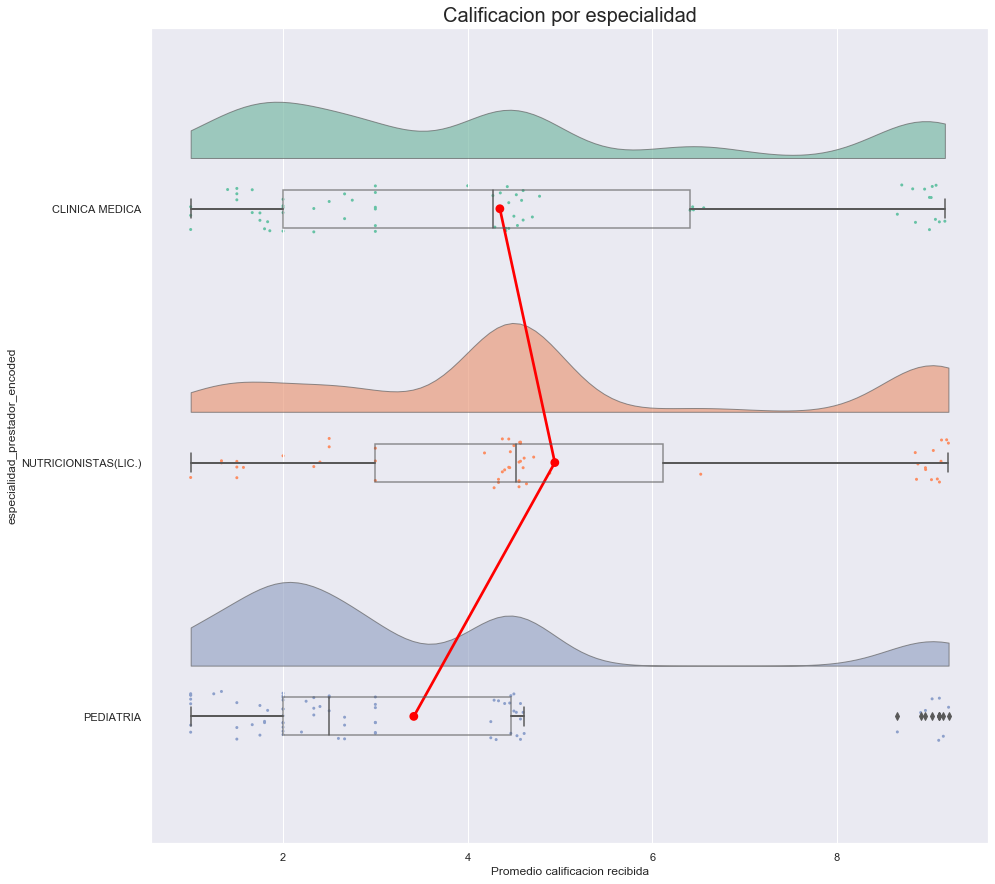

In [75]:
plt.figure(figsize=(15,15))

ax=pt.RainCloud(data=df,y='Promedio calificacion recibida',x=df.especialidad_prestador_encoded,orient='h',pointplot = True,alpha = .65)

plt.title("Calificacion por especialidad",fontsize=20)

plt.show()

* El mayor valor de media de los promedios por especialidada la tiene los nutricionista por lo que estos fueron los que recibieron un mayor numero de calficaciones altas
  *  Promedio calificacion recibida         4.943189
* El mayor valor de mediana de los promedios por especialidada la tiene los nutricionista 

## Explorar consumos. Analizar su distribución
  1. Ver especialidad y consumos
  2. 

Text(0, 0.5, 'Especilidad_Medica')

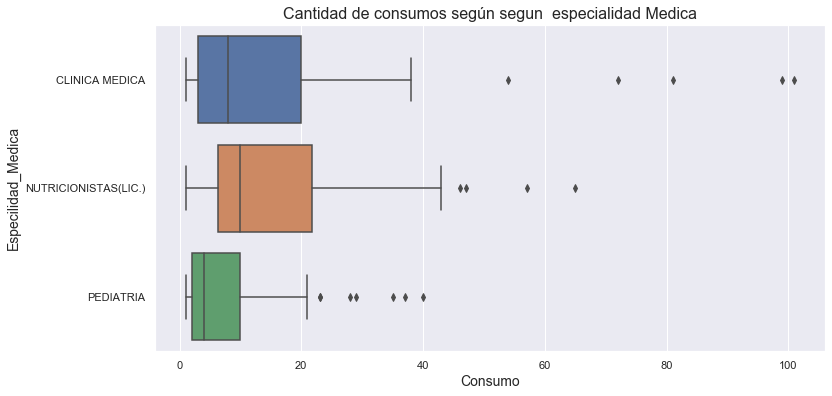

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=df['Q consumos'], y=df.especialidad_prestador_encoded)
plt.title('Cantidad de consumos según segun  especialidad Medica', size=16)
plt.xlabel('Consumo', size=14)
plt.ylabel('Especilidad_Medica', size=14)

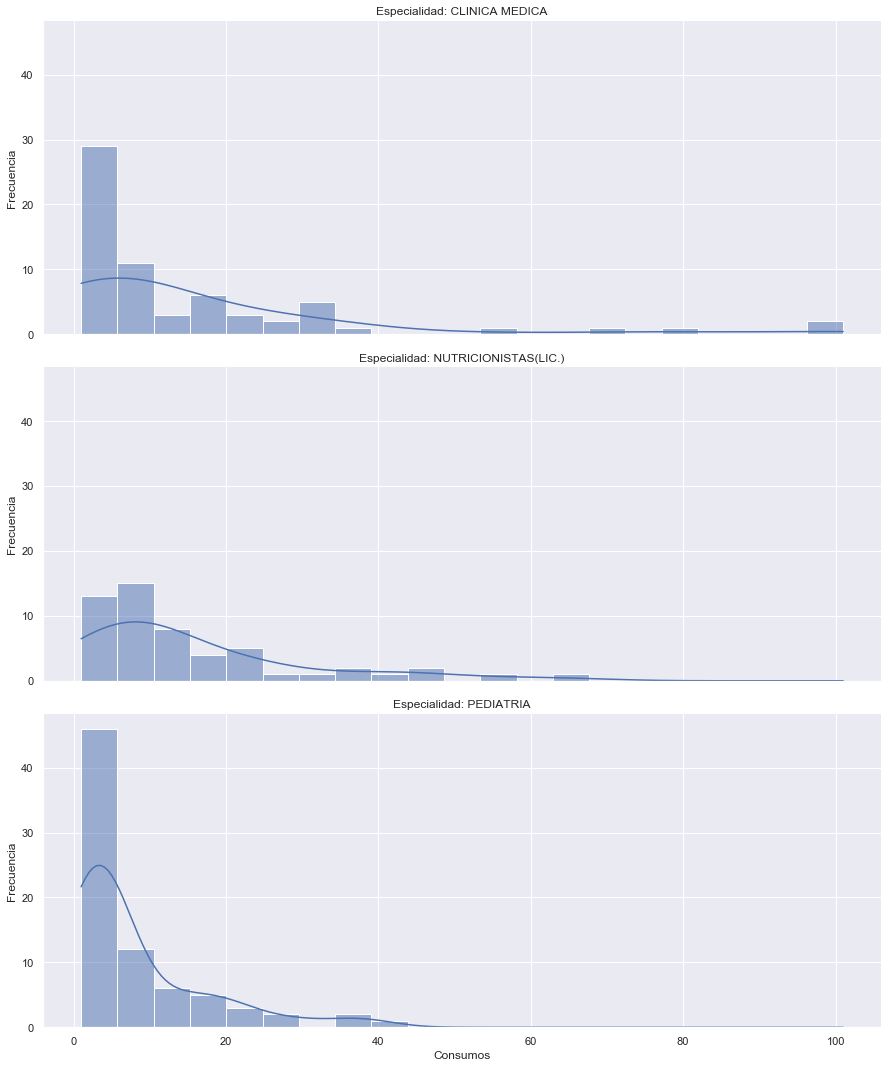

In [114]:
g =sns.displot(df, x="Q consumos", row="especialidad_prestador_encoded", aspect=2.5, kde=True)
g.set_axis_labels("Consumos", "Frecuencia")
g.set_titles(row_template="Especialidad: {row_name}")
df_1 = df[df['especialidad_prestador_encoded']=='CLINICA MEDICA']
df_2 = df[df['especialidad_prestador_encoded']=='NUTRICIONISTAS(LIC.)']
df_3 = df[df['especialidad_prestador_encoded']=='PEDIATRA']
#for row_val, ax in g.axes_dict.items():
   #  ax.axvline(40, color='orangered', linestyle='--', label='Media')

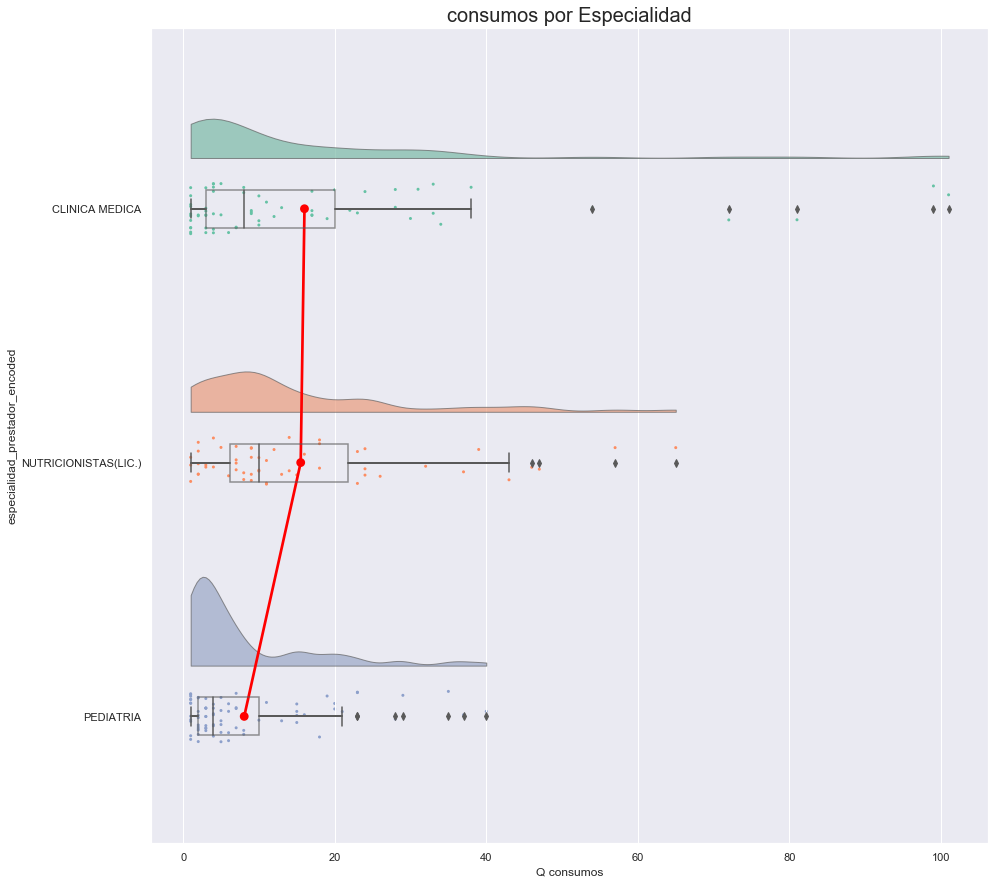

In [92]:
plt.figure(figsize=(15,15))

ax=pt.RainCloud(data=df,y='Q consumos',x=df.especialidad_prestador_encoded,orient='h',pointplot = True,alpha = .65)

plt.title("consumos por Especialidad",fontsize=20)

plt.show()

* El mayor valor de la media de los consumos por especialidada la tiene los nutricionista/Clinicos:son las especilidades que mas atendieron consultas
  *  Q por Clinico : 16.015385
  *  Q por Nutricionistas : 15.518519
  *  Q por pediatria :8.064935 
* El mayor valor de mediana de los promedios por especialidada la tiene los nutricionista 

In [113]:
print(df[df['especialidad_prestador_encoded']=='CLINICA MEDICA'].mean())
print(df[df['especialidad_prestador_encoded']=='NUTRICIONISTAS(LIC.)'].mean())
print(df[df['especialidad_prestador_encoded']=='PEDIATRIA'].mean())

id_prestador_encoded              200089.753846
Q consumos                            16.015385
Promedio calificacion recibida         4.348128
dtype: float64
id_prestador_encoded              200090.574074
Q consumos                            15.518519
Promedio calificacion recibida         4.943189
dtype: float64
id_prestador_encoded              200108.896104
Q consumos                             8.064935
Promedio calificacion recibida         3.416197
dtype: float64


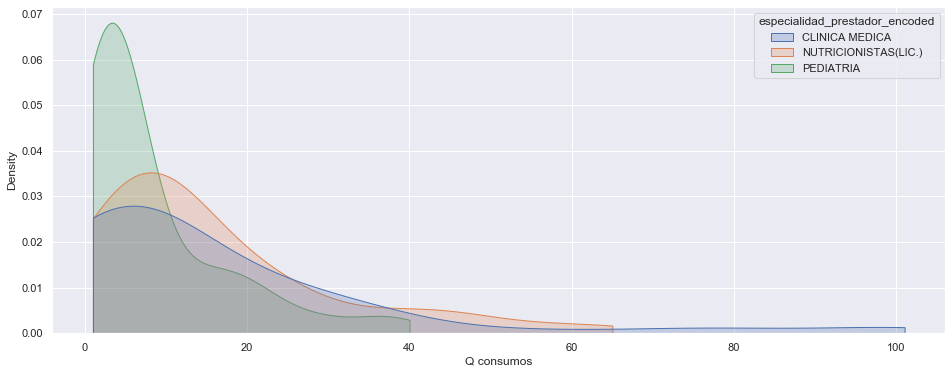

In [80]:
plt.figure(figsize=(16, 6))
sns.kdeplot(data=df, x="Q consumos", hue="especialidad_prestador_encoded", common_norm=False, shade=True,cut=0)
plt.show()

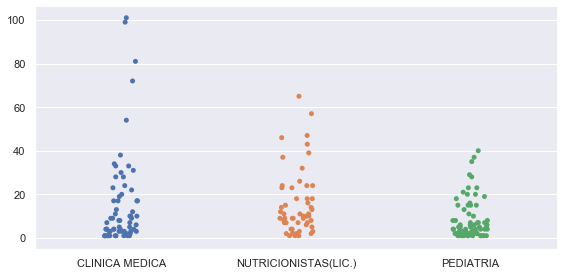

In [76]:
sns.catplot(data=df, y='Q consumos',
                x='especialidad_prestador_encoded', height=4, aspect=2)
plt.title('', size=16)
plt.xlabel('')
plt.ylabel('')
sns.despine()